# **云南大学软件学院 机器学习（实验-3）实验报告**

## **神经网络与反向传播算法**

**姓名：陈俊宏**

**学号：20211060245**

</br>

### **任务1：计算图**

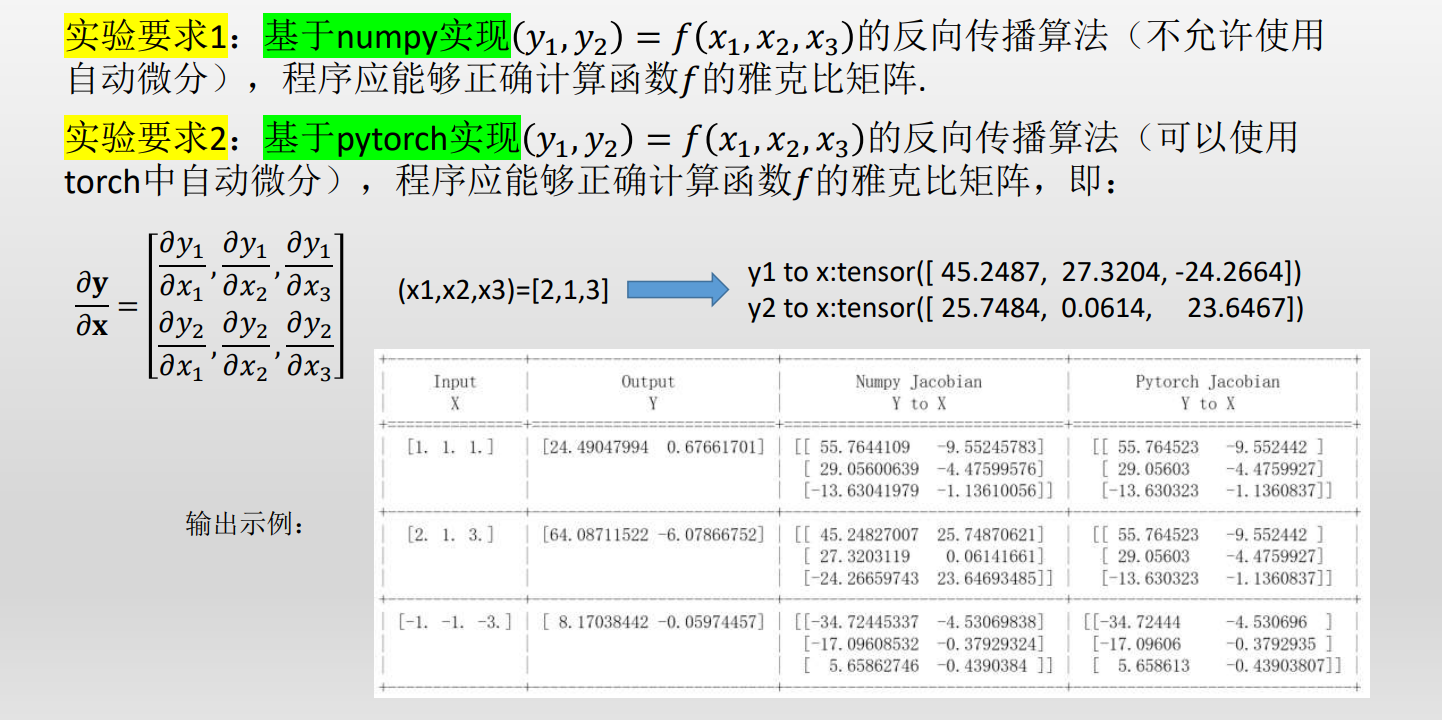

**在一开始，我尝试了使用矩阵运算和路径搜索算法去进行反向传播算法的实现。但是在实现的过程中困难重重，最后在参考PPT后，采用了定义固定的反向传播图的方式，最终实现了反向传播算法。**
<br/>

#### **任务1-1：基于numpy的计算图反向传播**

**利用numpy定义ComputationlGraph进行计算图的反向传播**

In [1]:
import numpy as np
import torch

class ComputationalGraph:
    def __init__(self) -> None:
        self.isForward = False
        # 初始化x1，x2，x3
        self.x1 = 0
        self.x2 = 0
        self.x3 = 0
        # 初始化z1，z2，z3，用以存储z1，z2，z3的计算结果
        self.z1 = 0
        self.z2 = 0
        self.z3 = 0
        # 初始化u1，u2，u3，用以存储u1，u2，u3的计算结果
        self.u1 = 0
        self.u2 = 0
        self.u3 = 0
        # 初始化v1，v2，v3，用以存储v1，v2，v3的计算结果
        self.v1 = 0
        self.v2 = 0
        self.v3 = 0
        # 初始化y1，y2，用以存储y1，y2的计算结果
        self.y1 = 0
        self.y2 = 0
        # 反向传播参数
        self.y1_to_v1 = 0
        self.y1_to_v2 = 0
        self.y2_to_v2 = 0
        self.y2_to_v3 = 0
        self.v1_to_u1 = 0
        self.v1_to_u3 = 0
        self.v2_to_u2 = 0
        self.v3_to_u1 = 0
        self.v3_to_u3 = 0
        self.u1_to_z1 = 0
        self.u2_to_z2 = 0
        self.u2_to_x3 = 0
        self.u3_to_z1 = 0
        self.u3_to_z3 = 0
        self.z1_to_x1 = 0
        self.z1_to_x2 = 0
        self.z2_to_x1 = 0
        self.z2_to_x3 = 0
        self.z3_to_x3 = 0
        self.y1_to_x1 = 0
        self.y1_to_x2 = 0
        self.y1_to_x3 = 0
        self.y2_to_x1 = 0
        self.y2_to_x2 = 0
        self.y2_to_x3 = 0

    def function_z1(self, x1, x2):
        self.z1 = 2 * x1 + x2

    def function_z2(self, x1, x3):
        self.z2 = x1 * 3 * x3

    def function_z3(self, x3):
        self.z3 = -x3

    def function_u1(self, z1):
        self.u1 = np.sin(z1)

    def function_u2(self, x3, z2):
        self.u2 = 2 * x3 + z2

    def function_u3(self, z1, z3):
        self.u3 = 2 * z1 + z3

    def function_v1(self, u1, u3):
        self.v1 = u1 - u3

    def function_v2(self, u2):
        self.v2 = np.sin(-u2)

    def function_v3(self, u1, u3):
        self.v3 = u1 * u3

    def function_y1(self, v1, v2):
        self.y1 = v1 ** 2 + v2 ** 3

    def function_y2(self, v2, v3):
        self.y2 = v2 * v3

    # 前向传播
    def forward(self, x1: int, x2: int, x3: int):
        self.x1 = x1
        self.x2 = x2
        self.x3 = x3
        self.function_z1(self.x1, self.x2)
        self.function_z2(self.x1, self.x3)
        self.function_z3(self.x3)
        self.function_u1(self.z1)
        self.function_u2(self.x3, self.z2)
        self.function_u3(self.z1, self.z3)
        self.function_v1(self.u1, self.u3)
        self.function_v2(self.u2)
        self.function_v3(self.u1, self.u3)
        self.function_y1(self.v1, self.v2)
        self.function_y2(self.v2, self.v3)
        self.isForward = True
        return self.y1, self.y2

    # 反向传播
    def backward(self):
        if not self.isForward:
            print("Please run forward first!")
            return
        else:
            self.y1_to_v1 = 2 * self.v1
            self.y1_to_v2 = 3 * self.v2 ** 2
            self.y2_to_v2 = self.v3
            self.y2_to_v3 = self.v2
            self.v1_to_u1 = 1
            self.v1_to_u3 = -1
            self.v2_to_u2 = -np.cos(-self.u2)
            self.v3_to_u1 = self.u3
            self.v3_to_u3 = self.u1
            self.u1_to_z1 = np.cos(self.z1)
            self.u2_to_z2 = 1
            self.u2_to_x3 = 2
            self.u3_to_z1 = 2
            self.u3_to_z3 = 1
            self.z1_to_x1 = 2
            self.z1_to_x2 = 1
            self.z2_to_x1 = 3 * self.x3
            self.z2_to_x3 = self.x1 * 3
            self.z3_to_x3 = -1
            self.y1_to_x1 = self.y1_to_v1 * self.v1_to_u1 * self.u1_to_z1 * self.z1_to_x1 + self.y1_to_v1 * self.v1_to_u3 * self.u3_to_z1 * self.z1_to_x1 + self.y1_to_v2 * self.v2_to_u2 * self.u2_to_z2 * self.z2_to_x1
            self.y1_to_x2 = self.y1_to_v1 * self.v1_to_u1 * self.u1_to_z1 * self.z1_to_x2 + self.y1_to_v1 * self.v1_to_u3 * self.u3_to_z1 * self.z1_to_x2
            self.y1_to_x3 = self.y1_to_v1 * self.v1_to_u3 * self.u3_to_z3 * self.z3_to_x3 + self.y1_to_v2 * self.v2_to_u2 * self.u2_to_x3 + self.y1_to_v2 * self.v2_to_u2 * self.u2_to_z2 * self.z2_to_x3

            self.y2_to_x1 = self.y2_to_v3 * self.v3_to_u1 * self.u1_to_z1 * self.z1_to_x1 + self.y2_to_v3 * self.v3_to_u3 * self.u3_to_z1 * self.z1_to_x1 + self.y2_to_v2 * self.v2_to_u2 * self.u2_to_z2 * self.z2_to_x1
            self.y2_to_x2 = self.y2_to_v3 * self.v3_to_u1 * self.u1_to_z1 * self.z1_to_x2 + self.y2_to_v3 * self.v3_to_u3 * self.u3_to_z1 * self.z1_to_x2
            self.y2_to_x3 = self.y2_to_v2 * self.v2_to_u2 * self.u2_to_z2 * self.z2_to_x3 + self.y2_to_v3 * self.v3_to_u3 * self.u3_to_z3 * self.z3_to_x3 + self.y2_to_v2 * self.v2_to_u2 * self.u2_to_x3
            return np.array(
                [[self.y1_to_x1, self.y1_to_x2, self.y1_to_x3], [self.y2_to_x1, self.y2_to_x2, self.y2_to_x3]]).T

if __name__ == '__main__':
    x1 = 2
    x2 = 1
    x3 = 3
    model = ComputationalGraph()
    y1, y2 = model.forward(x1, x2, x3)
    x_grad = model.backward()
    print("numpy:")
    print(x_grad)

numpy:
[[ 45.24866101  25.74837188]
 [ 27.32040539   0.06138621]
 [-24.26642612  23.6466917 ]]


<br/>

#### **任务1-2：基于pytorch的计算图反向传播**

**利用pytorch定义ComputationlGraph进行计算图的反向传播**

In [3]:
class PyTorchGraph:
    def __init__(self) -> None:
        self.isForward = False
        # 初始化x1，x2，x3
        self.X = torch.tensor(0, dtype=torch.float32)
        # 初始化z1，z2，z3，用以存储z1，z2，z3的计算结果
        self.z1 = torch.tensor(0, dtype=torch.float32)
        self.z2 = torch.tensor(0, dtype=torch.float32)
        self.z3 = torch.tensor(0, dtype=torch.float32)
        # 初始化u1，u2，u3，用以存储u1，u2，u3的计算结果
        self.u1 = torch.tensor(0, dtype=torch.float32)
        self.u2 = torch.tensor(0, dtype=torch.float32)
        self.u3 = torch.tensor(0, dtype=torch.float32)
        # 初始化v1，v2，v3，用以存储v1，v2，v3的计算结果
        self.v1 = torch.tensor(0, dtype=torch.float32)
        self.v2 = torch.tensor(0, dtype=torch.float32)
        self.v3 = torch.tensor(0, dtype=torch.float32)
        # 初始化y1，y2，用以存储y1，y2的计算结果
        self.y1 = torch.tensor(0, dtype=torch.float32)
        self.y2 = torch.tensor(0, dtype=torch.float32)

    def function_z1(self, X):
        self.z1 = 2 * X[0] + X[1]

    def function_z2(self, X):
        self.z2 = X[0] * 3 * X[2]

    def function_z3(self, X):
        self.z3 = -X[2]

    def function_u1(self, z1):
        self.u1 = torch.sin(z1)

    def function_u2(self, X, z2):
        self.u2 = 2 * X[2] + z2

    def function_u3(self, z1, z3):
        self.u3 = 2 * z1 + z3

    def function_v1(self, u1, u3):
        self.v1 = u1 - u3

    def function_v2(self, u2):
        self.v2 = torch.sin(-u2)

    def function_v3(self, u1, u3):
        self.v3 = u1 * u3

    def function_y1(self, v1, v2):
        self.y1 = v1 ** 2 + v2 ** 3

    def function_y2(self, v2, v3):
        self.y2 = v2 * v3

    # 前向传播
    def forward(self, x1, x2, x3):
        self.X = torch.tensor([x1, x2, x3], dtype=torch.float32)
        self.X.requires_grad = True
        self.function_z1(self.X)
        self.function_z2(self.X)
        self.function_z3(self.X)
        self.function_u1(self.z1)
        self.function_u2(self.X, self.z2)
        self.function_u3(self.z1, self.z3)
        self.function_v1(self.u1, self.u3)
        self.function_v2(self.u2)
        self.function_v3(self.u1, self.u3)
        self.function_y1(self.v1, self.v2)
        self.function_y2(self.v2, self.v3)
        self.isForward = True
        return self.y1, self.y2

    # 反向传播
    def backward(self):
        if not self.isForward:
            print("Please run forward first!")
            return
        else:
            self.y1.backward(retain_graph=True)
            y1_grad = self.X.grad.clone()
            self.X.grad.zero_()
            self.y2.backward()
            y2_grad = self.X.grad.clone()
            self.X.grad.zero_()
            return torch.stack([y1_grad, y2_grad], dim=1)

if __name__ == '__main__':
    x1 = 2
    x2 = 1
    x3 = 3
    model = PyTorchGraph()
    y1_torch, y2_torch = model.forward(x1, x2, x3)
    x_grad = model.backward()
    print("pytorch:")
    print(x_grad.cpu().numpy())

pytorch:
[[ 45.248657    25.748371  ]
 [ 27.320404     0.06138623]
 [-24.266426    23.64669   ]]


<br/>

### **任务2：基于前向神经网络的分类预测**

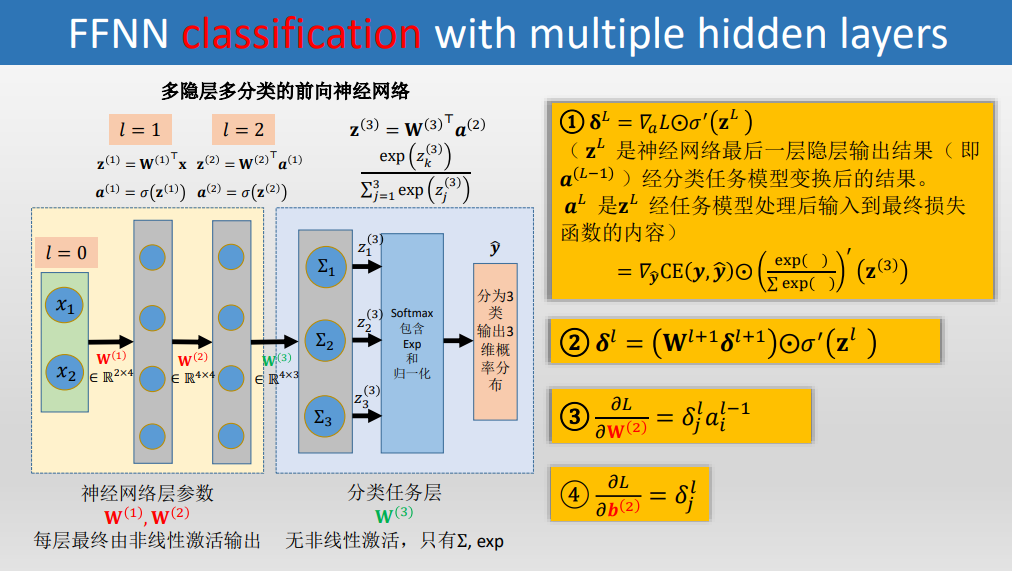

<br/>

#### **任务2-1：基于numpy的神经网络分类预测**

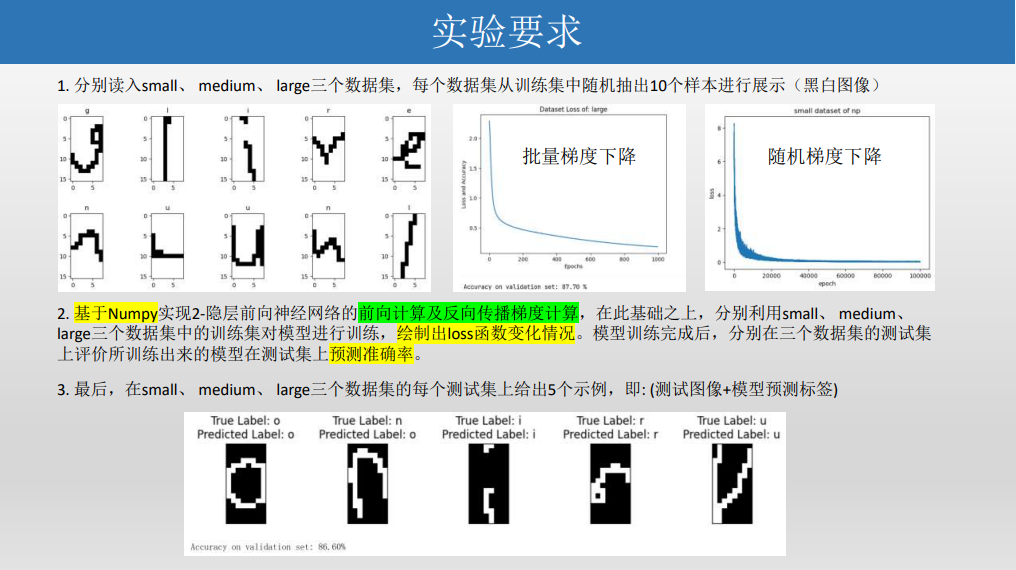

In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据集
small_trainDataset = pd.read_csv("./data/smallTrain.csv", header=None)
medium_trainDataset = pd.read_csv("./data/mediumTrain.csv", header=None)
large_trainDataset = pd.read_csv("./data/largeTrain.csv", header=None)
small_testDataset = pd.read_csv("./data/smallValidation.csv", header=None)
medium_testDataset = pd.read_csv("./data/mediumValidation.csv", header=None)
large_testDataset = pd.read_csv("./data/largeValidation.csv", header=None)

# 定义映射表
mapping_table = {0: 'a', 1: 'e', 2: 'g', 3: 'i', 4: 'l', 5: 'n', 6: 'o', 7: 'r', 8: 't', 9: 'u'}

def show_plt(label, datanum=None, method=None, epochs=None, loss_list=None, inputs=None, outputs=None, targets=None,
             accuracy=None, scale=None):
    if label == 'loss':
        scale = None
        if datanum.shape[1] < 600:
            scale = 'small'
        elif datanum.shape[1] < 6000:
            scale = 'medium'
        elif datanum.shape[1] < 10000:
            scale = 'large'

        plt.scatter(list(range(epochs)), loss_list)
        plt.title(f'{method}({scale}Dataset)\nAccuracy on {scale}Dataset(train): {accuracy * 100}%')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.show()
    elif label == 'show':
        fig, ax = plt.subplots(1, 5, figsize=(20, 4))
        for i in range(5):
            characteristic = inputs[:, i:i + 1].reshape((16, 8))
            ax[i].imshow(characteristic, cmap='gray')
            ax[i].set_title(f'True Label:{targets[i]}\nPredicted Label:{outputs[i]}')

        plt.suptitle(f'Accuracy on {scale}Dataset(test): {accuracy * 100}%')
        plt.tight_layout()
        plt.show()


class NeuralNetwork:
    def __init__(self):
        self.a0_node = 128
        self.a1_node = 10
        self.a2_node = 10
        self.a3_node = 10
        self.z1 = None
        self.z2 = None
        self.z3 = None
        self.a1 = None
        self.a2 = None
        self.a3 = None
        self.w1 = np.random.uniform(-1, 1, size=[self.a0_node, self.a1_node]).astype(np.float32)
        self.w2 = np.random.uniform(-1, 1, size=[self.a1_node, self.a2_node]).astype(np.float32)
        self.w3 = np.random.uniform(-1, 1, size=[self.a2_node, self.a3_node]).astype(np.float32)
        self.b1 = np.random.uniform(-1, 1, size=[self.a1_node, 1]).astype(np.float32)
        self.b2 = np.random.uniform(-1, 1, size=[self.a2_node, 1]).astype(np.float32)
        self.b3 = np.random.uniform(-1, 1, size=[self.a3_node, 1]).astype(np.float32)

    # 定义sigmoid函数
    def sigmoid(self, x):
        x = np.clip(x, -88.72, 88.72)
        return 1 / (1 + np.exp(-x))

    # 定义softmax
    def softmax(self, logits):
        logits = np.exp(logits)
        total = np.sum(logits, axis=0)
        return logits / total

    # 前向计算
    def feedforward(self, inputs):
        self.z1 = np.dot(self.w1.T, inputs) + self.b1
        self.a1 = self.sigmoid(self.z1)

        self.z2 = np.matmul(self.w2.T, self.a1) + self.b2
        self.a2 = self.sigmoid(self.z2)

        self.z3 = np.matmul(self.w3.T, self.a2) + self.b3
        self.a3 = self.softmax(self.z3)

        return self.a3

    # Loss损失函数
    def Loss(self, inputs, targets):
        outputs = self.feedforward(inputs)
        total_loss = 0
        len = inputs.shape[1]
        for num in range(len):
            output = outputs[:, num:num + 1]
            target = targets[:, num:num + 1]
            total_loss += np.matmul(target.T, np.log(output))
        loss = -total_loss / len
        return loss

    # 反向传播
    def backpropagation(self, inputs, targets, learning_rate):
        # 统计inputs的个数
        n = inputs.shape[1]

        # 前向计算
        outputs = self.feedforward(inputs)

        # 计算损失函数对各层Z的导数
        loss_to_z3 = outputs - targets
        loss_to_z2 = np.matmul(self.w3, loss_to_z3) * (self.a2 * (1 - self.a2))
        loss_to_z1 = np.matmul(self.w2, loss_to_z2) * (self.a1 * (1 - self.a1))

        # 计算损失函数对各层W的导数
        loss_to_w3 = 1 / n * np.matmul(self.a2, loss_to_z3.T)
        loss_to_w2 = 1 / n * np.matmul(self.a1, loss_to_z2.T)
        loss_to_w1 = 1 / n * np.matmul(inputs, loss_to_z1.T)

        # 计算损失函数对各层b的导数
        loss_to_b3 = loss_to_z3.mean(axis=1, keepdims=True)
        loss_to_b2 = loss_to_z2.mean(axis=1, keepdims=True)
        loss_to_b1 = loss_to_z1.mean(axis=1, keepdims=True)

        # 更新各层权重
        self.w3 -= (learning_rate * loss_to_w3)
        self.w2 -= (learning_rate * loss_to_w2)
        self.w1 -= (learning_rate * loss_to_w1)
        self.b3 -= (learning_rate * loss_to_b3)
        self.b2 -= (learning_rate * loss_to_b2)
        self.b1 -= (learning_rate * loss_to_b1)

    def predict(self, inputs):
        outputs = self.feedforward(inputs)
        return outputs

    # 对输出矩阵找出每一列最大概率对应的字母，返回输出矩阵对应的字母向量
    def label(self, inputs):
        label_list = []

        for num in range(inputs.shape[1]):
            input = inputs[:, num:num + 1]
            input_index = np.argmax(input)
            letter = mapping_table.get(int(input_index))
            label_list.append(letter)
        return label_list

    def accuracy(self, inputs, targets):
        correct = 0
        outputs = self.feedforward(inputs)
        for num in range(outputs.shape[1]):
            output = outputs[:, num:num + 1]
            target = targets[:, num:num + 1]

            output_index = np.argmax(output)
            target_index = np.argmax(target)

            if output_index == target_index:
                correct += 1
        acc = correct / targets.shape[1]
        return acc


def process_dataset(dataset):
    x = np.array(dataset.iloc[:, 1:])
    y = dataset.iloc[:, 0]

    y = y.astype(int)
    y = np.eye(10)[y]

    x = x.T
    y = y.T

    return x, y


def get_data_batch(inputs, batch_size):
    """
    循环产生批量数据batch
    :param inputs: list数据
    :param batch_size: batch大小
    :return: 返回一个batch数据
    """
    for i in range(0, inputs.shape[1], batch_size):
        yield inputs[:, i:i + batch_size]


if __name__ == '__main__':
    # 选择数据集
    medium_x_train, medium_y_train = process_dataset(medium_trainDataset)
    medium_x_test, medium_y_test = process_dataset(medium_testDataset)

    # 超参数设置
    method = 'SGD'
    epochs = 20000
    batch_size = 10
    learning_rate = 0.1

    net = NeuralNetwork()
    loss_list = []

    # 随机梯度下降
    if method == 'SGD':
        for epoch in range(epochs):
            num = random.randint(0, medium_x_train.shape[1] - 1)
            x_train = medium_x_train[:, num:num + 1]
            y_train = medium_y_train[:, num:num + 1]
            net.backpropagation(x_train, y_train, learning_rate)

            loss = net.Loss(medium_x_train, medium_y_train)

            loss_list.append(loss)

            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss:{loss}')

        accuracy = net.accuracy(medium_x_train, medium_y_train)
        show_plt(label='loss', datanum=medium_x_train, epochs=epochs, method='SGD', loss_list=loss_list,
                 accuracy=accuracy)
    # 小批量随机梯度下降
    elif method == 'MBGD':
        batchs_x = list(get_data_batch(medium_x_train, batch_size=batch_size))
        batchs_y = list(get_data_batch(medium_y_train, batch_size=batch_size))
        for epoch in range(epochs):
            for batch_x, batch_y in zip(batchs_x, batchs_y):
                x_train = batch_x
                y_train = batch_y

                net.backpropagation(x_train, y_train, learning_rate)

            loss = net.Loss(medium_x_train, medium_y_train)

            loss_list.append(loss)

        accuracy = net.accuracy(medium_x_train, medium_y_train)
        show_plt(label='loss', datanum=medium_x_train, epochs=epochs, method='MBGD', loss_list=loss_list,
                 accuracy=accuracy)

    accuracy = net.accuracy(medium_x_test, medium_y_test)

    random_mediumList = []
    for i in range(5):
        random_mediumNum = random.randint(0, medium_x_test.shape[1] - 1)
        random_mediumList.append(random_mediumNum)
    present_medium_x_test = medium_x_test[:, random_mediumList]
    present_medium_y_test = medium_y_test[:, random_mediumList]

    outputs = net.predict(present_medium_x_test)
    outputs_labels = net.label(outputs)
    targets_labels = net.label(present_medium_y_test)

    show_plt(label='show', inputs=present_medium_x_test, outputs=outputs_labels, targets=targets_labels,
             accuracy=accuracy, scale='medium')


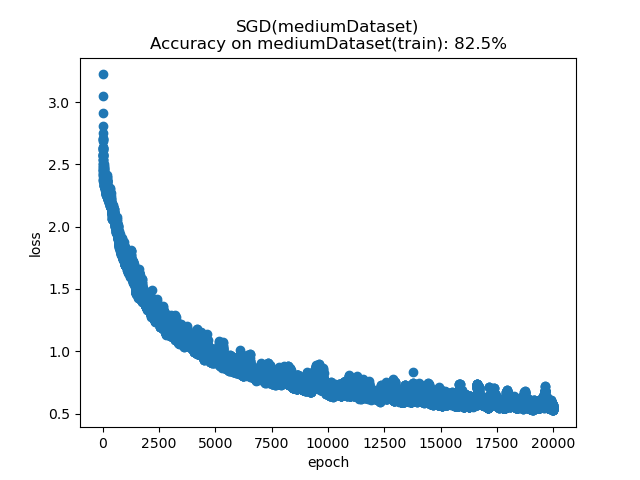

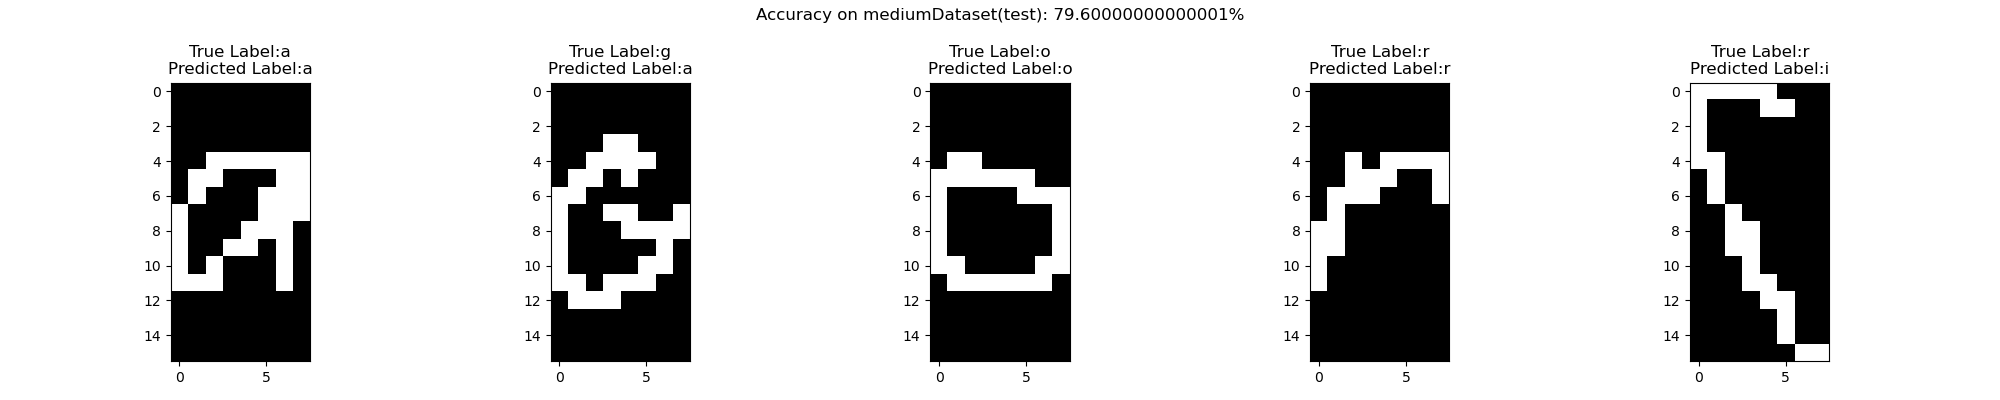

<br/>

#### **任务2-2：基于pytorch的神经网络分类预测**

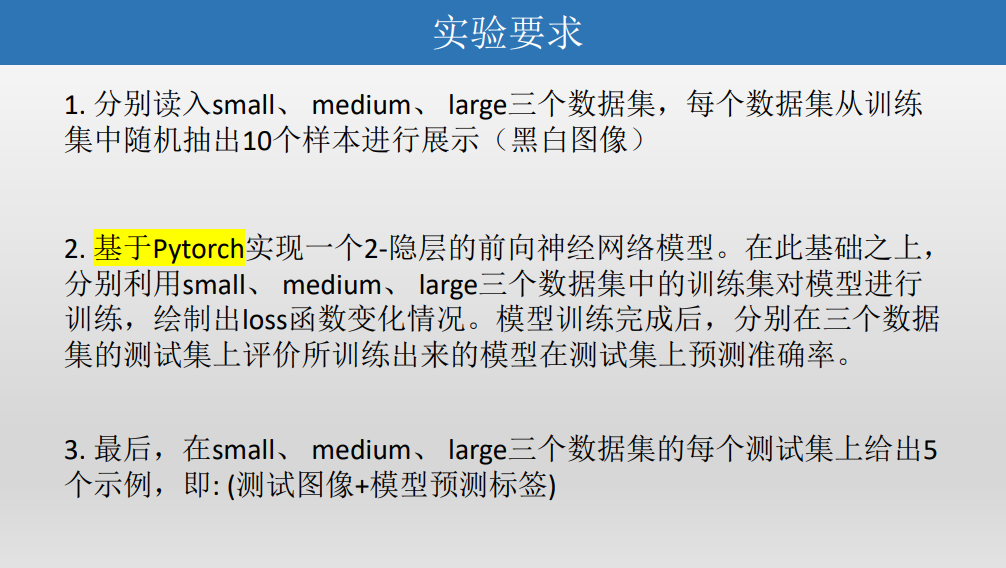

In [ ]:
import random
import torch
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader

small_trainDataset = pd.read_csv("./data/smallTrain.csv", header=None)
medium_trainDataset = pd.read_csv("./data/mediumTrain.csv", header=None)
large_trainDataset = pd.read_csv("./data/largeTrain.csv", header=None)
small_testDataset = pd.read_csv("./data/smallValidation.csv", header=None)
medium_testDataset = pd.read_csv("./data/mediumValidation.csv", header=None)
large_testDataset = pd.read_csv("./data/largeValidation.csv", header=None)

mapping_table = {0: 'a', 1: 'e', 2: 'g', 3: 'i', 4: 'l', 5: 'n', 6: 'o', 7: 'r', 8: 't', 9: 'u'}


def show_plt(label, datanum=None, method=None, epochs=None, loss_list=None, inputs=None, outputs=None, targets=None,
             accuracy=None, scale=None):
    if label == 'loss':
        scale = None
        if datanum.shape[1] < 600:
            scale = 'small'
        elif datanum.shape[1] < 6000:
            scale = 'medium'
        elif datanum.shape[1] < 10000:
            scale = 'large'

        plt.scatter(list(range(epochs)), loss_list)
        plt.title(f'{method}({scale}Dataset)\nAccuracy on {scale}Dataset(train): {accuracy * 100}%')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.show()
    elif label == 'show':
        fig, ax = plt.subplots(1, 5, figsize=(20, 4))
        for i in range(5):
            characteristic = inputs[:, i:i + 1].reshape((16, 8))
            ax[i].imshow(characteristic, cmap='gray')
            ax[i].set_title(f'True Label:{targets[i]}\nPredicted Label:{outputs[i]}')

        plt.suptitle(f'Accuracy on {scale}Dataset(test): {accuracy * 100}%')
        plt.tight_layout()
        plt.show()


class NeuralNetwork:
    def __init__(self):
        self.a0_node = 128
        self.a1_node = 10
        self.a2_node = 10
        self.a3_node = 10
        self.z1 = None
        self.z2 = None
        self.z3 = None
        self.a1 = None
        self.a2 = None
        self.a3 = None
        self.w1 = torch.Tensor(self.a0_node, self.a1_node)
        torch.nn.init.uniform_(self.w1, a=-1, b=1)
        self.w2 = torch.Tensor(self.a1_node, self.a2_node)
        torch.nn.init.uniform_(self.w2, a=-1, b=1)
        self.w3 = torch.Tensor(self.a2_node, self.a3_node)
        torch.nn.init.uniform_(self.w3, a=-1, b=1)
        self.b1 = torch.Tensor(self.a1_node, 1)
        torch.nn.init.uniform_(self.b1, a=-1, b=1)
        self.b2 = torch.Tensor(self.a2_node, 1)
        torch.nn.init.uniform_(self.b2, a=-1, b=1)
        self.b3 = torch.Tensor(self.a3_node, 1)
        torch.nn.init.uniform_(self.b3, a=-1, b=1)

    def sigmoid(self, x):
        x = torch.clip(x, -88.72, 88.72)
        return 1 / (1 + torch.exp(-x))

    def softmax(self, logits):
        logits = torch.exp(logits)
        total = torch.sum(logits, dim=0)
        return logits / total

    def feedforward(self, inputs):
        self.z1 = torch.matmul(self.w1.T, inputs) + self.b1
        self.a1 = self.sigmoid(self.z1)

        self.z2 = torch.matmul(self.w2.T, self.a1) + self.b2
        self.a2 = self.sigmoid(self.z2)

        self.z3 = torch.matmul(self.w3.T, self.a2) + self.b3
        self.a3 = self.softmax(self.z3)

        return self.a3

    # Loss
    def Loss(self, inputs, targets):
        outputs = self.feedforward(inputs)
        total_loss = 0
        len = inputs.shape[1]
        for num in range(len):
            output = outputs[:, num:num + 1]
            target = targets[:, num:num + 1]
            total_loss += torch.matmul(target.T, torch.log(output))
        loss = -total_loss / len
        return loss

    # 反向传播
    def backpropagation(self, inputs, targets, learning_rate):
        # 统计inputs的个数
        n = inputs.shape[1]

        # 前向计算
        outputs = self.feedforward(inputs)

        # 计算损失函数对各层Z的导数
        loss_to_z3 = outputs - targets
        loss_to_z2 = torch.matmul(self.w3, loss_to_z3) * (self.a2 * (1 - self.a2))
        loss_to_z1 = torch.matmul(self.w2, loss_to_z2) * (self.a1 * (1 - self.a1))

        # 计算损失函数对各层W的导数
        loss_to_w3 = 1 / n * torch.matmul(self.a2, loss_to_z3.T)
        loss_to_w2 = 1 / n * torch.matmul(self.a1, loss_to_z2.T)
        loss_to_w1 = 1 / n * torch.matmul(inputs, loss_to_z1.T)

        # 计算损失函数对各层b的导数
        loss_to_b3 = loss_to_z3.mean(axis=1, keepdims=True)
        loss_to_b2 = loss_to_z2.mean(axis=1, keepdims=True)
        loss_to_b1 = loss_to_z1.mean(axis=1, keepdims=True)

        # 更新各层权重
        self.w3 -= (learning_rate * loss_to_w3)
        self.w2 -= (learning_rate * loss_to_w2)
        self.w1 -= (learning_rate * loss_to_w1)
        self.b3 -= (learning_rate * loss_to_b3)
        self.b2 -= (learning_rate * loss_to_b2)
        self.b1 -= (learning_rate * loss_to_b1)

    def predict(self, inputs):
        outputs = self.feedforward(inputs)
        return outputs

    def label(self, inputs):
        label_list = []

        for num in range(inputs.shape[1]):
            input = inputs[:, num:num + 1]
            input_index = torch.argmax(input)
            letter = mapping_table.get(int(input_index))
            label_list.append(letter)
        return label_list

    def accuracy(self, inputs, targets):
        correct = 0
        outputs = self.feedforward(inputs)
        for num in range(outputs.shape[1]):
            output = outputs[:, num:num + 1]
            target = targets[:, num:num + 1]

            output_index = torch.argmax(output)
            target_index = torch.argmax(target)

            if output_index == target_index:
                correct += 1
        acc = correct / targets.shape[1]
        return acc


def process_dataset(dataset):
    x = torch.Tensor(dataset.iloc[:, 1:].values)
    y = dataset.iloc[:, 0]

    y = y.astype(int)
    y = torch.eye(10)[y]

    x = x.T
    y = y.T

    return x, y


if __name__ == '__main__':
    # 选择数据集
    small_x_train, small_y_train = process_dataset(small_trainDataset)
    small_x_test, small_y_test = process_dataset(small_testDataset)

    # 超参数设置
    method = 'MBGD'
    epochs = 1000
    batch_size = 20
    learning_rate = 0.2
    loss_list = []

    net = NeuralNetwork()
    # 随机梯度下降
    if method == 'SGD':
        for epoch in range(epochs):
            num = random.randint(0, small_x_train.shape[1] - 1)
            x_train = small_x_train[:, num:num + 1]
            y_train = small_y_train[:, num:num + 1]
            net.backpropagation(x_train, y_train, learning_rate)

            loss = net.Loss(small_x_train, small_y_train).item()

            loss_list.append(loss)

            if loss < 0.1:
                learning_rate = 0.02

            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss:{net.Loss(small_x_train, small_y_train)}')

        accuracy = net.accuracy(small_x_train, small_y_train)
        show_plt(label='loss', datanum=small_x_train, epochs=epochs, method='SGD', loss_list=loss_list,
                 accuracy=accuracy)
    # 小批量随机梯度下降
    elif method == 'MBGD':
        dataset_x = TensorDataset(small_x_train.T)
        batchs_x = DataLoader(dataset_x, batch_size=batch_size)
        dataset_y = TensorDataset(small_y_train.T)
        batchs_y = DataLoader(dataset_y, batch_size=batch_size)
        for epoch in range(epochs):
            for batch_x, batch_y in zip(batchs_x, batchs_y):
                x_train = batch_x[0].T
                y_train = batch_y[0].T

                net.backpropagation(x_train, y_train, learning_rate)

            loss = net.Loss(small_x_train, small_y_train).item()

            loss_list.append(loss)

            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss:{loss}')
        accuracy = net.accuracy(small_x_train, small_y_train)
        show_plt(label='loss', datanum=small_x_train, epochs=epochs, method='MBGD', loss_list=loss_list,
                 accuracy=accuracy)

    accuracy = net.accuracy(small_x_test, small_y_test)

    random_smallList = []
    for i in range(5):
        random_smallNum = random.randint(0, small_x_test.shape[1] - 1)
        random_smallList.append(random_smallNum)
    present_small_x_test = small_x_test[:, random_smallList]
    present_small_y_test = small_y_test[:, random_smallList]

    outputs = net.predict(present_small_x_test)
    outputs_labels = net.label(outputs)
    targets_labels = net.label(present_small_y_test)

    show_plt(label='show', inputs=present_small_x_test, outputs=outputs_labels, targets=targets_labels,
             accuracy=accuracy, scale='small')


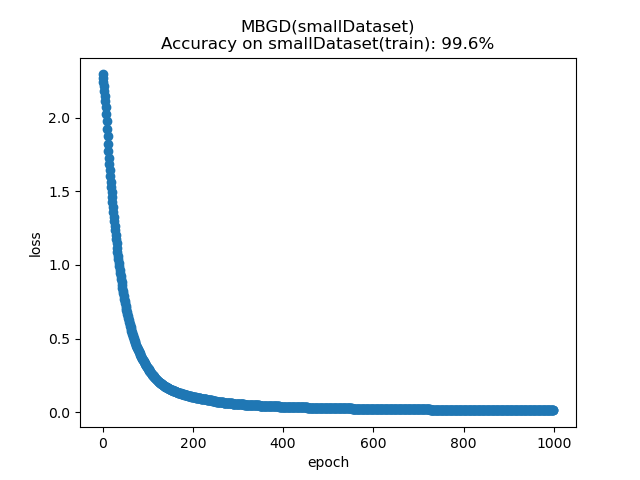

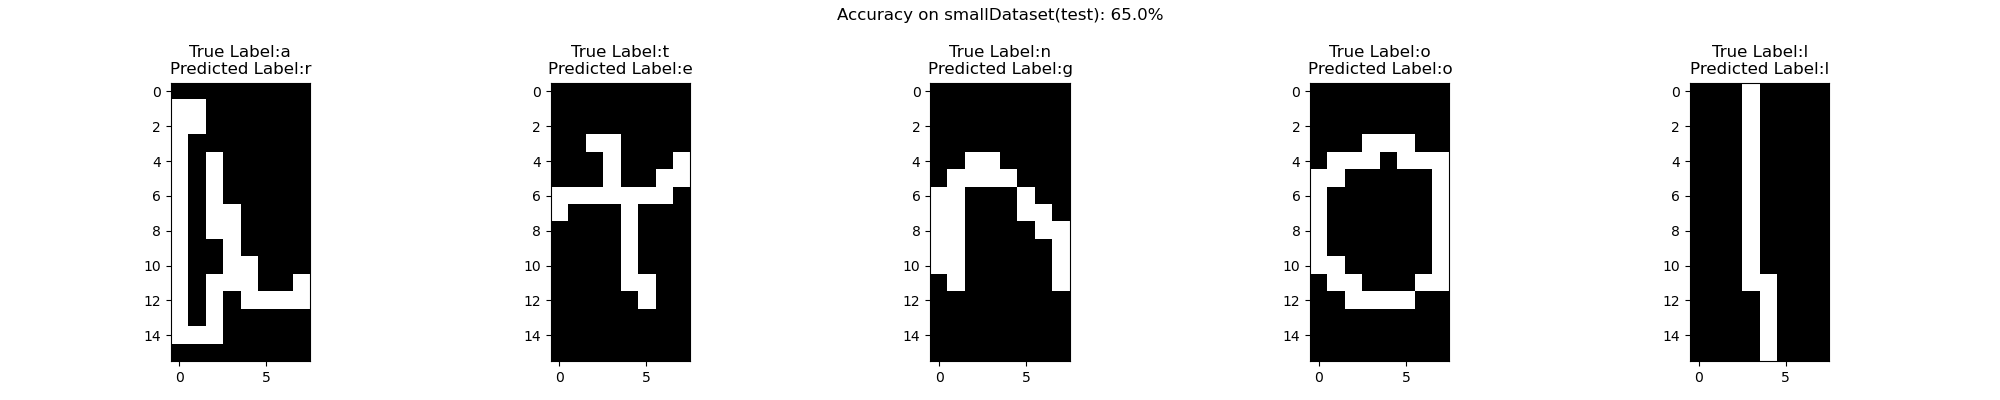

<br/>

### **任务3：基于前向神经网络的回归预测**

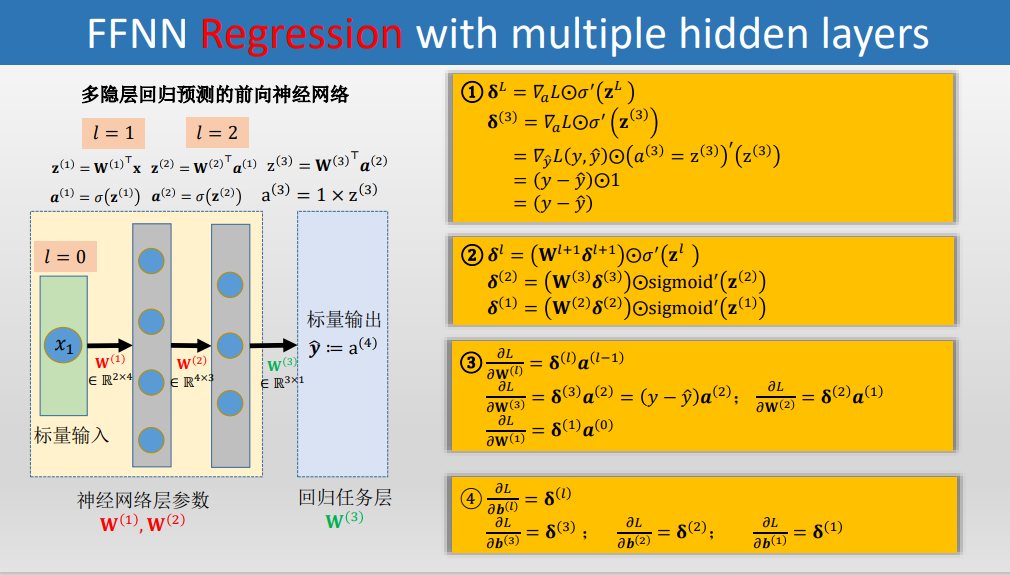

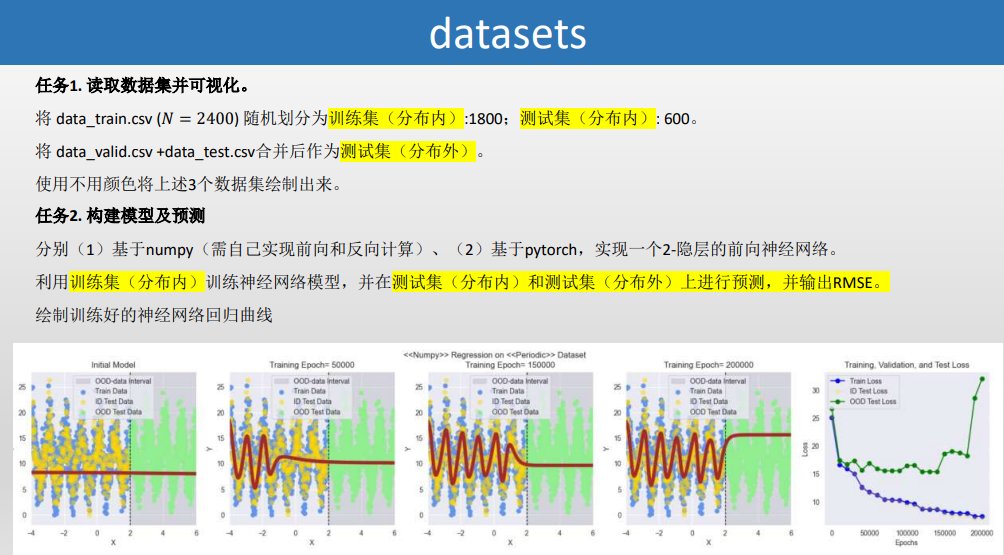

　　此部分参考了研究生学长的笔记，在其代码上加以改进得来。

#### **任务3-1：基于numpy的神经网络回归预测**

**定义DataSet文件，用以加载数据并进行处理，即np_dataset.py**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split


class RegressionData:
    def __init__(self, batch_norm="BatchNorm", valid_ratio=0.25):
        """
        初始化回归数据集对象。
        :param batch_norm: 是否进行批量归一化，默认为 "BatchNorm"。
        :param valid_ratio: 验证集的比例，默认为 0.25。
        """
        self.batch_norm = batch_norm
        self.valid_ratio = valid_ratio

        # 读取数据集
        data_train = np.genfromtxt(f"../data/data_train.csv", delimiter=',', skip_header=1)
        data_valid = np.genfromtxt(f"../data/data_valid.csv", delimiter=',', skip_header=1)
        data_test = np.genfromtxt(f"../data/data_test.csv", delimiter=',', skip_header=1)

        # 分离X和Y
        self.x_train, self.y_train = data_train[:, 0], data_train[:, 1]

        self.x_train, self.x_valid, self.y_train, self.y_valid = train_test_split(self.x_train, self.y_train,
                                                                                  test_size=valid_ratio,
                                                                                  random_state=42)

        self.x_test, self.y_test = np.append(data_test[:, 0], data_valid[:, 0]), np.append(data_test[:, 1], data_valid[:, 1])

        if self.batch_norm == "BatchNorm":
            # 将数据的均值缩放至0，方差缩放至1 （验证集和测试集使用训练集的均值和方差来缩放）
            self.x_train, self.x_mean, self.x_std = self.normalize(self.x_train)
            self.y_train, self.y_mean, self.y_std = self.normalize(self.y_train)
            self.x_valid = self.normalize(self.x_valid, mean=self.x_mean, std=self.x_std)
            self.y_valid = self.normalize(self.y_valid, mean=self.y_mean, std=self.y_std)
            self.x_test = self.normalize(self.x_test, mean=self.x_mean, std=self.x_std)
            self.y_test = self.normalize(self.y_test, mean=self.y_mean, std=self.y_std)

        # 将数据维度转化为[1,n]
        self.x_train = self.x_train.reshape(1, -1)
        self.y_train = self.y_train.reshape(1, -1)
        self.x_valid = self.x_valid.reshape(1, -1)
        self.y_valid = self.y_valid.reshape(1, -1)
        self.x_test = self.x_test.reshape(1, -1)
        self.y_test = self.y_test.reshape(1, -1)

    # 数据归一化
    def normalize(self, x, mean=None, std=None):
        """
        如果mean=None,std=None，则计算x本身的均值和方差，并归一化.
        :param mean: 使用其他数据的均值来归一化x
        :param std: 使用其他数据的方差来归一化x
        """
        if mean is not None and std is not None:
            x_norm = (x - mean) / std
            return x_norm
        else:
            mean = np.mean(x)
            std = np.std(x)
            x_norm = (x - mean) / std
            return x_norm, mean, std

    def unnormalize(self, x_norm, mean, std):
        return x_norm * std + mean

<br/>

**定义Model文件，用来定义和持久化模型结构，即np_model.py**

In [ ]:
import numpy as np
import pickle


class NpRegressionModel:
    def __init__(self, x_dim, h1_dim, h2_dim, y_dim):
        """
        初始化基于Numpy的回归网络模型。
        :param x_dim: 输入特征的维度
        :param h1_dim: 隐藏层1的维度
        :param h2_dim: 隐藏层2的维度
        :param y_dim: 输出类别的维度
        """
        self.x_dim = x_dim
        self.h1_dim = h1_dim
        self.h2_dim = h2_dim
        self.y_dim = y_dim

        # TODO: 权重矩阵的初始化对梯度下降的影响很大，尝试其他初始化方法？
        self.W1 = self._uniform([x_dim, h1_dim])
        self.b1 = self._uniform([h1_dim, 1])
        self.W2 = self._uniform([h1_dim, h2_dim])
        self.b2 = self._uniform([h2_dim, 1])
        self.W3 = self._uniform([h2_dim, y_dim])
        self.b3 = self._uniform([y_dim, 1])

    def _uniform(self, shape):
        """
        均匀分布初始化权重矩阵。
        :param shape: 权重矩阵的形状
        :return: 初始化后的权重矩阵
        """
        # 从均匀分布中采样权重
        initial_weights = np.random.uniform(-1, 1, size=shape)
        initial_weights = initial_weights.astype(np.float32)
        return initial_weights

    def _sigmoid(self, x):
        """
        Sigmoid激活函数。
        :param x: 输入
        :return: 激活后的输出
        """
        x = np.clip(x, -88.72, 88.72)  # 防止分母上指数函数的计算溢出
        return 1 / (1 + np.exp(-x))

    def forward(self, x):
        """
        前向传播。
        :param x: 输入数据
        :return: 模型的输出
        """
        self.x = x
        self.z_1 = self.W1.T @ self.x + self.b1
        self.a_1 = self._sigmoid(self.z_1)
        self.z_2 = self.W2.T @ self.a_1 + self.b2
        self.a_2 = self._sigmoid(self.z_2)
        self.z_3 = self.W3.T @ self.a_2 + self.b3
        self.y_hat = 1 * self.z_3
        return self.y_hat

    def loss(self, y_hat, y):
        """
        计算均方根误差损失。
        :param y_hat: 预测值
        :param y: 真实值
        :return: 均方根误差损失
        """
        # 确保y_hat和y具有相同的形状
        assert y_hat.shape == y.shape, "y_hat和y的形状必须相匹配."
        self.y = y

        # 计算均方根误差损失
        rmse_loss = np.sqrt(((y_hat - y) ** 2).mean())

        return rmse_loss

    def backward(self):
        """
        反向传播，计算权重矩阵的微分图。
        """
        n = self.y.shape[1]
        # (BP1)
        self.delta_3 = self.y_hat - self.y

        # (BP2)
        self.delta_2 = self.W3 @ self.delta_3 * (self._sigmoid(self.z_2) * (1 - self._sigmoid(self.z_2)))
        self.delta_1 = self.W2 @ self.delta_2 * (self._sigmoid(self.z_1) * (1 - self._sigmoid(self.z_1)))

        # (BP3)
        self.W_3_grid = 1 / n * self.a_2 @ (self.delta_3).T
        self.W_2_grid = 1 / n * self.a_1 @ (self.delta_2).T
        self.W_1_grid = 1 / n * self.x @ (self.delta_1).T

        # (BP4)
        self.b_3_grid = self.delta_3.mean(axis=1, keepdims=True)
        self.b_2_grid = self.delta_2.mean(axis=1, keepdims=True)
        self.b_1_grid = self.delta_1.mean(axis=1, keepdims=True)

    def zero_grad(self):
        """
        清零当前保存的所有梯度信息，方便下一步迭代时进行反向传播
        """
        self.delta_3 = 0
        self.delta_2 = 0
        self.delta_1 = 0
        self.W_3_grid = 0
        self.W_2_grid = 0
        self.W_1_grid = 0
        self.b_3_grid = 0
        self.b_2_grid = 0
        self.b_1_grid = 0

    def step(self, lr=0.001):
        """
        使用梯度下降更新权重矩阵。
        :param lr: 学习率
        """
        # 梯度下降更新权重矩阵
        self.W1 -= lr * self.W_1_grid
        self.b1 -= lr * self.b_1_grid
        self.W2 -= lr * self.W_2_grid
        self.b2 -= lr * self.b_2_grid
        self.W3 -= lr * self.W_3_grid
        self.b3 -= lr * self.b_3_grid

    def save(self, filename):
        """
        保存模型参数到文件。
        :param filename: 文件名 (例如，XXX.pkl)
        """
        model_params = {
            'x_dim': self.x_dim,
            'h1_dim': self.h1_dim,
            'h2_dim': self.h2_dim,
            'y_dim': self.y_dim,
            'W1': self.W1,
            'b1': self.b1,
            'W2': self.W2,
            'b2': self.b2,
            'W3': self.W3,
            'b3': self.b3,
            # 添加其他需要保存的参数
        }

        with open(filename, 'wb') as file:
            pickle.dump(model_params, file)

    def load(self, filename):
        """
        从文件加载模型的权重和偏置参数。
        :param filename: 要加载的文件名 (例如，XXX.pkl)
        """
        with open(filename, 'rb') as file:
            model_params = pickle.load(file)

        # 从加载的模型参数中更新模型的权重和偏置
        self.x_dim = model_params['x_dim']
        self.h1_dim = model_params['h1_dim']
        self.h2_dim = model_params['h2_dim']
        self.y_dim = model_params['y_dim']
        self.W1 = model_params['W1']
        self.b1 = model_params['b1']
        self.W2 = model_params['W2']
        self.b2 = model_params['b2']
        self.W3 = model_params['W3']
        self.b3 = model_params['b3']

        # 添加其他需要加载的参数

        return self  # 返回自身，以便链式调用

        return self  # 返回自身，以便链式调用

<br/>

**定义运行文件，用以整合DataSet和Model，并以整体形式运行，并保存一些运行参数，即np_run.py。其中隐藏层的神经元数量为（10, 5）**

In [ ]:
from np_dataset import RegressionData
from np_model import NpRegressionModel
import pandas as pd

# 载入数据
dataset = RegressionData()
x_train, y_train, x_valid, y_valid, x_test, y_test = dataset.x_train, dataset.y_train, dataset.x_valid, dataset.y_valid, dataset.x_test, dataset.y_test

# 保存训练日志用以绘图
train_log = {
    'epoch': [],
    'train_loss': [],
    'valid_loss': [],
    'test_loss': []
}

# 初始化模型
model = NpRegressionModel(x_dim=1, h1_dim=10, h2_dim=5, y_dim=1)

# 训练超参数参数
epochs = 200000
learning_rate = 0.4

# 训练循环
for epoch in range(epochs):
    # 前向传播
    y_pred = model.forward(x_train)
    # 计算损失
    loss = model.loss(y_pred, y_train)
    # 反向传播
    model.backward()
    # 更新权重
    model.step(lr=learning_rate)
    # 每隔一定的epoch打印损失值
    if epoch % 100 == 0 or epoch == epochs - 1:
        train_log['epoch'].append(epoch)
        train_log['train_loss'].append(loss)

        y_pred_valid = model.forward(x_valid)
        valid_loss = model.loss(y_pred_valid, y_valid)
        train_log['valid_loss'].append(valid_loss)

        y_pred_test = model.forward(x_test)
        test_loss = model.loss(y_pred_test, y_test)
        train_log['test_loss'].append(test_loss)

        print(f'Epoch {epoch}, train_loss: {loss}, valid_loss: {valid_loss}, test_loss: {test_loss}')
    if epoch + 1 == 1:
        model.save('initial_model.pkl')
    elif epoch + 1 == 50000:
        model.save('50000_model.pkl')
    elif epoch + 1 == 150000:
        model.save('150000_model.pkl')
    elif epoch + 1 == 200000:
        model.save('200000_model.pkl')

print("Training finished!")

# 保存训练日志
train_log = pd.DataFrame(train_log)
train_log.to_csv('../data/np_train_log.csv', index=False)

**最终读取训练好的模型文件，并进行数据可视化，结果如下：**

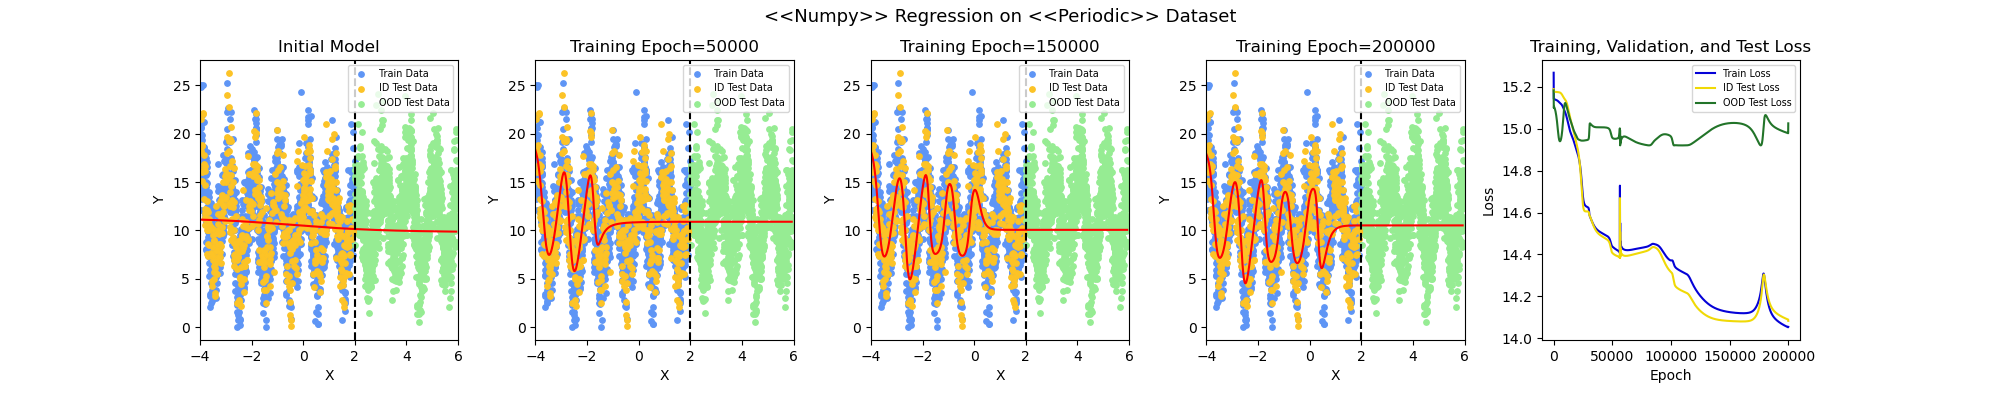

#### **任务3-2：基于pytorch的神经网络回归预测**

**定义DataSet文件，用以加载数据并进行处理，即dataset.py**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split


class RegressionData:
    def __init__(self, batch_norm="BatchNorm", valid_ratio=0.25):
        """
        初始化回归数据集对象。
        :param batch_norm: 是否进行批量归一化，默认为 "BatchNorm"。
        :param valid_ratio: 验证集的比例，默认为 0.25。
        """
        self.batch_norm = batch_norm
        self.valid_ratio = valid_ratio

        # 读取数据集
        data_train = np.genfromtxt(f"../data/data_train.csv", delimiter=',', skip_header=1)
        data_valid = np.genfromtxt(f"../data/data_valid.csv", delimiter=',', skip_header=1)
        data_test = np.genfromtxt(f"../data/data_test.csv", delimiter=',', skip_header=1)

        # 分离X和Y
        self.x_train, self.y_train = data_train[:, 0], data_train[:, 1]

        self.x_train, self.x_valid, self.y_train, self.y_valid = train_test_split(self.x_train, self.y_train,
                                                                                  test_size=valid_ratio,
                                                                                  random_state=42)

        self.x_test, self.y_test = np.append(data_test[:, 0], data_valid[:, 0]), np.append(data_test[:, 1], data_valid[:, 1])

        if self.batch_norm == "BatchNorm":
            # 将数据的均值缩放至0，方差缩放至1 （验证集和测试集使用训练集的均值和方差来缩放）
            self.x_train, self.x_mean, self.x_std = self.normalize(self.x_train)
            self.y_train, self.y_mean, self.y_std = self.normalize(self.y_train)
            self.x_valid = self.normalize(self.x_valid, mean=self.x_mean, std=self.x_std)
            self.y_valid = self.normalize(self.y_valid, mean=self.y_mean, std=self.y_std)
            self.x_test = self.normalize(self.x_test, mean=self.x_mean, std=self.x_std)
            self.y_test = self.normalize(self.y_test, mean=self.y_mean, std=self.y_std)

        # 将数据维度转化为[1,n]
        self.x_train = self.x_train.reshape(1, -1)
        self.y_train = self.y_train.reshape(1, -1)
        self.x_valid = self.x_valid.reshape(1, -1)
        self.y_valid = self.y_valid.reshape(1, -1)
        self.x_test = self.x_test.reshape(1, -1)
        self.y_test = self.y_test.reshape(1, -1)

    # 数据归一化
    def normalize(self, x, mean=None, std=None):
        """
        如果mean=None,std=None，则计算x本身的均值和方差，并归一化.
        :param mean: 使用其他数据的均值来归一化x
        :param std: 使用其他数据的方差来归一化x
        """
        if mean is not None and std is not None:
            x_norm = (x - mean) / std
            return x_norm
        else:
            mean = np.mean(x)
            std = np.std(x)
            x_norm = (x - mean) / std
            return x_norm, mean, std

    def unnormalize(self, x_norm, mean, std):
        return x_norm * std + mean


<br/>

**基于pytorch，由于pytorch的简洁性，直接完整构建运行代码，其中两层隐藏层的神经元数量为（64, 32）**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from dataset import RegressionData


# 定义深度神经网络模型
class RegressionModel(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x


# 设置随机种子以便复现结果
torch.manual_seed(42)

# 定义模型参数
input_size = 1  # 输入特征的维度
hidden_size1 = 64  # 隐藏层的大小
hidden_size2 = 32  # 隐藏层的大小
output_size = 1  # 输出特征的维度

# 实例化模型并将模型移动到GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RegressionModel(input_size, hidden_size1, hidden_size2, output_size).to(device)

# 定义损失函数
criterion = nn.MSELoss()

# 定义优化器
learning_rate = 0.01
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# 载入数据
dataset = RegressionData()
x_train, y_train, x_valid, y_valid, x_test, y_test = dataset.x_train, dataset.y_train, dataset.x_valid, dataset.y_valid, dataset.x_test, dataset.y_test

# 将数据转换为PyTorch张量并移动到GPU
train_input = torch.tensor(x_train.T, dtype=torch.float32).to(device)
train_target = torch.tensor(y_train.T, dtype=torch.float32).to(device)
x_valid = torch.tensor(x_valid.T, dtype=torch.float32).to(device)
y_valid = torch.tensor(y_valid.T, dtype=torch.float32).to(device)
x_test = torch.tensor(x_test.T, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test.T, dtype=torch.float32).to(device)

# 训练模型
num_epochs = 200000

# 保存训练日志用以绘图
train_log = {
    'epoch': [],
    'train_loss': [],
    'valid_loss': [],
    'test_loss': []
}

for epoch in range(num_epochs):
    # 前向传播
    outputs = model(train_input)

    # 计算损失
    loss = criterion(outputs, train_target.view(-1, 1))

    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch == 0:
        torch.save(model, 'initial_model.pth')
    elif (epoch + 1) == 50000:
        torch.save(model, '5w_model.pth')
    elif (epoch + 1) == 150000:
        torch.save(model, '15w_model.pth')
    elif (epoch + 1) == 200000:
        torch.save(model, '20w_model.pth')

    # 打印每100次迭代的损失
    if epoch % 100 == 0 or epoch == num_epochs - 1:
        with torch.no_grad():
            valid_outputs = model(x_valid)
            valid_loss = criterion(valid_outputs, y_valid.view(-1, 1))
            test_outputs = model(x_test)
            test_loss = criterion(test_outputs, y_test.view(-1, 1))
            train_log['epoch'].append(epoch + 1)
            train_log['train_loss'].append(loss.item())
            train_log['valid_loss'].append(valid_loss.item())
            train_log['test_loss'].append(test_loss.item())
        print(f'Epoch {epoch + 1}, Train Loss: {loss.item():.4f}, Valid Loss: {valid_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')


print('Finished Training')

# 保存训练日志
pd = pd.DataFrame(train_log)
pd.to_csv('../data/neural_train_log.csv', index=False)


**最终读取训练好的模型文件，并进行数据可视化，结果如下：**

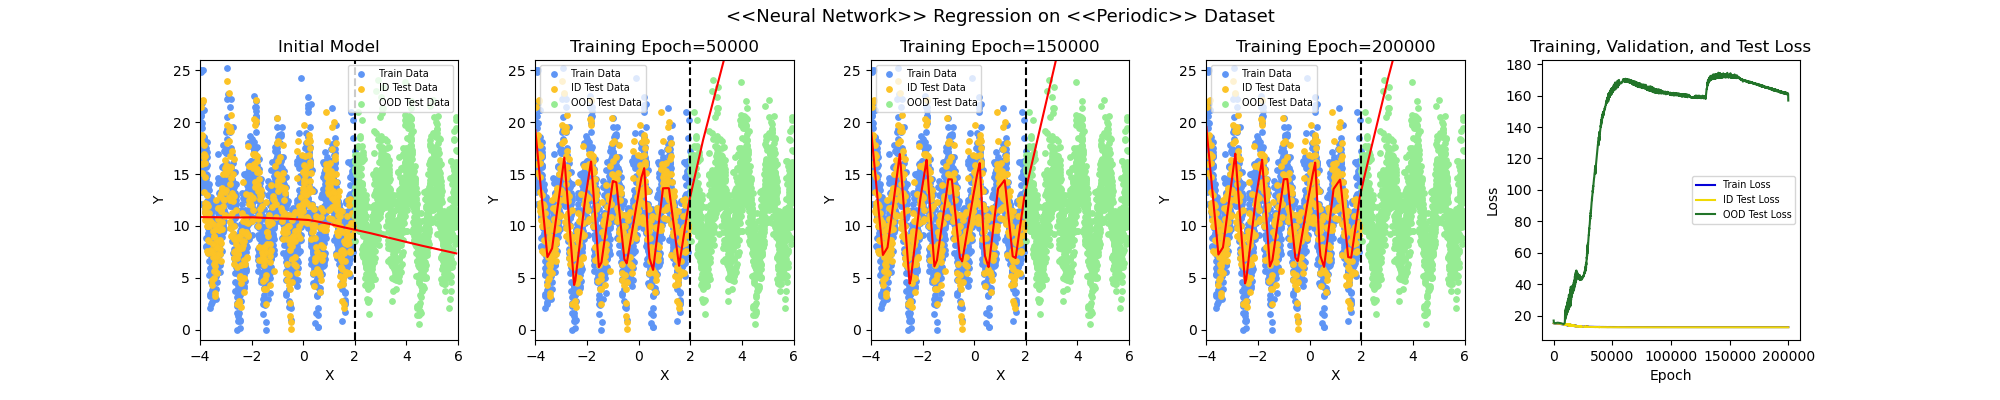

</br>

## **实验总结**

　　在本次实验中，我实现了计算图的定义和反向传播算法的实现，同时运用numpy工具，构建了基于神经网络的分类和基于神经网络的回归两个任务。通过此次实验，我了解了反向传播算法的实现原理，并在此的基础上进一步运用四个 **`反向传播公式`** ，实现了基本的神经网络的搭建以及回归任务和分类任务的完成。同时又运用pytorch框架，更加简洁高效的构建了神经网络，了解了pytorch框架的基本使用，这些都将在我之后的学习生活中给予我较大的帮助。